In [1]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
# %config InlineBackend.figure_formats = ['svg']
from qiskit import *

In [2]:
# qiskit.__qiskit_version__

In [3]:
# IBMQ.save_account('8f371c4cd9299d2d47d8fb8921b3ac568ddd7ee69f1677c378224aa662e56d67b1753e0117ec71562b7da34ef2f73fd82b316664e2ab8fa8dc3827a626ebfe75')

In [4]:
# IBMQ.load_account()

In [5]:
theta = 0
shots=1e3
g= 5

In [6]:
qr = QuantumRegister(9)
cr = ClassicalRegister(9)
circuit = QuantumCircuit(qr,cr)

circuit.ry(2*theta,1)
circuit.ch(1,2)

circuit.ry(2*theta,3)
circuit.ch(3,4)
circuit.h(3)
circuit.h(4)

circuit.ry(2*theta,5)
circuit.ch(5,6)
circuit.rx(np.pi/2,5)
circuit.rx(np.pi/2,6)

circuit.ry(2*theta,7)
circuit.ch(7,8)
circuit.h(7)


circuit.measure([1,2,3,4,5,6,7,8],[1,2,3,4,5,6,7,8])

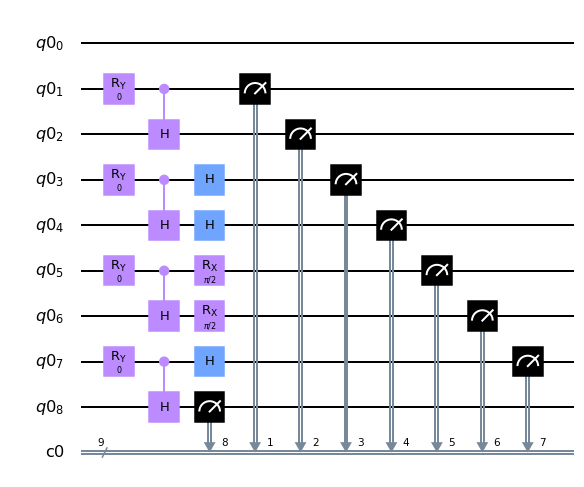

In [7]:
%matplotlib inline
circuit.draw(output='mpl')

In [8]:
IBMQ.load_account()

c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
QC_type =0
if QC_type == 0:
    provider = IBMQ.get_provider('ibm-q')
    backend = provider.get_backend('ibmq_16_melbourne') # Quantum Computer
else: 
    backend = Aer.get_backend('qasm_simulator') # Quantum Simulator

In [10]:
job = execute(circuit, backend, shots=shots)
result = job.result()
count = result.get_counts(circuit)

In [12]:
# print(result.job_id())
# from iskit.tools.monitor import job_monitor
# job_monitor(result)

In [13]:
def prob(block,qq,count,shots):
    if block == 'e':
        [i,j] = [6,7]
    elif block == 'xx':
        [i,j] = [4,5]
    elif block == 'yy':
        [i,j] = [2,3]
    elif block == 'ix':
        [i,j] = [0,1]
    P=0
    for k in list(count.keys()): 
        pieces = []
        for n in range(len(k)):
            pieces.append(k[n])
        if str(pieces[i])+str(pieces[j]) == qq:
            P += count[k]
    return P / shots

In [14]:
def Hamiltonian(theta,count,shots=1024,g=1):
    P_00 = prob('e','00',count=count,shots=shots) 
    
    Pxx_00 = prob('xx','00',count=count,shots=shots)
    Pxx_11 = prob('xx','11',count=count,shots=shots)

    Pyy_00 = prob('yy','00',count=count,shots=shots)
    Pyy_11 = prob('yy','11',count=count,shots=shots)

    Pzx_00 = prob('ix','00',count=count,shots=shots)
    Pzx_11 = prob('ix','11',count=count,shots=shots)

    Pix_00 = prob('ix','00',count=count,shots=shots)
    Pix_10 = prob('ix','10',count=count,shots=shots)
    #hamiltonian
    H_E = 3*(1 - P_00)
    H_B = (1/2)*( 5*(Pxx_00 + Pxx_11) + 5*(Pix_00 + Pix_10) + 3*(Pzx_00 + Pzx_11) - 3*(Pyy_00 + Pyy_11) -5)
    H = (g**2 /2)*H_E - (1/(2*g**2))*H_B
    return H 

In [15]:
H = Hamiltonian(theta,count=count,shots=shots,g=g)

In [16]:
H

7.232919999999998

In [ ]:
# job = backend.retrieve_job('605b1de35bf3402fcdd3f6d9')

In [ ]:
# count = job.result().get_counts(circuit)

In [17]:
from qiskit.visualization import plot_histogram

In [18]:
# plot_histogram(count)

In [19]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal , CompleteMeasFitter)

In [20]:
cal_circuits , state_labels = complete_meas_cal( qr = circuit.qregs[0],circlabel = 'measerrormitigationcal')

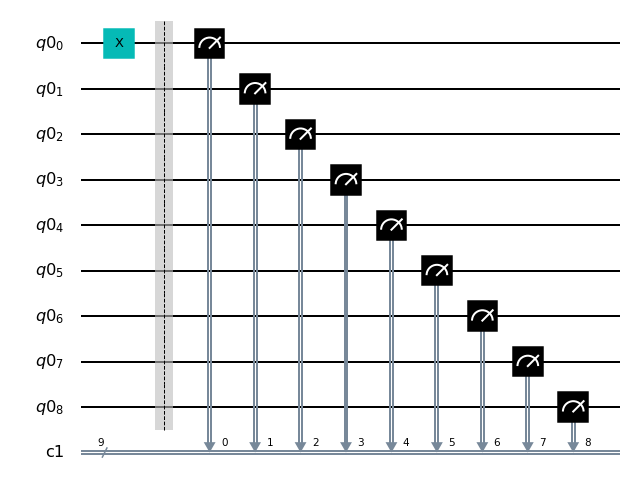

In [21]:
cal_circuits[1].draw(output='mpl')

In [22]:
len(cal_circuits)

512

In [25]:
from qiskit.tools.monitor import job_monitor
cal_job = execute(cal_circuits,
                 backend = backend,
                 optimization_level = 0,
                 )
print(cal_job.job_id())
job_monitor(cal_job)

605defdf7d904dba621e97e9
Job Status: job incurred error    


In [ ]:
# f = open("g_5_results.txt",'a+')
# item = [theta,H]
# f.write( "%r\n" %item )
# f.close() 